# Graph Spectral Image Processing

This jupyter notebook aims at illustrating the concepts introduced in the lecture. It relies on pygsp library whose documentation is available [here](https://pygsp.readthedocs.io/en/v0.4/index.html). It contains tutorials and excerices. It is split into the following parts:

- [1 - Introduction to Graph Signals](#1-graph-signals)
- [2 - Graph variational operators](#2-graph-var-operators)
- [3 - Graph Transform](#3-graph-transform)

<a id='1-graph-signals'></a> 
# 1 - Introduction to Graph Signals

First task, is to import the pygsp library and other useful libraries for general signal processing and mathematics

In [1]:
import numpy as np
import pygsp as gp
from pygsp import graphs
import matplotlib.pyplot as plt


## 1.1 - Load a Graph template
Before considering graph signals, we have to investigate how to handle graphs with the pygsp library. A first way is to load graph templates (they are listed [here](https://pygsp.readthedocs.io/en/v0.4/reference/graphs.html)). For example, let us first load the grid 2D graphs.

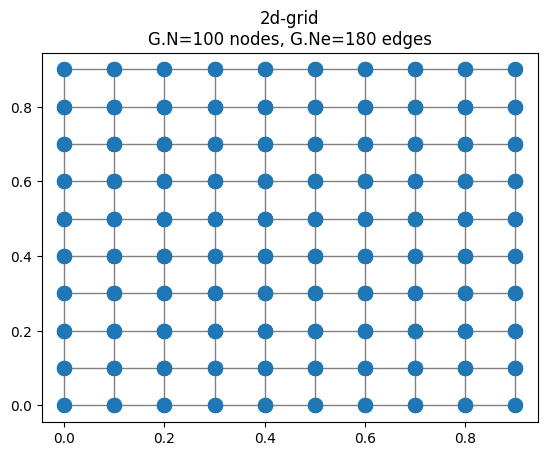

In [2]:
# the grid 2D
Ngrid = 10 # to set the number of nodes per row and column
Ggrid = graphs.Grid2d(Ngrid) # to create the graph
Ggrid.plot() # to show the graph

One can see that, in this graph, the nodes are organized as a 2D grid, exactly like the pixels of an image. We will use this graph later in order to illustrate how concepts defined on graphs behave on classical images. One can see below some other examples of graphs.

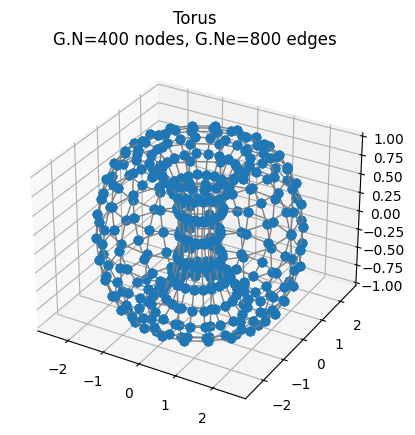

In [3]:
# torus
Ntorus = 20 # to set the number of nodes per torus slice
Gtorus = graphs.Torus(Ntorus) # to create the graph
Gtorus.plot() # to plot the graph

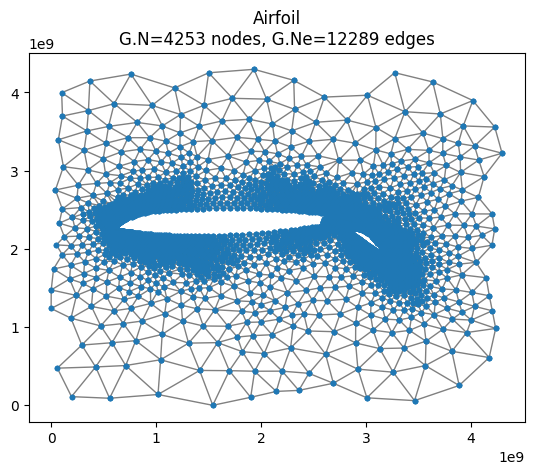

In [4]:
# Community
Gaf = graphs.Airfoil() # to create the graph
Gaf.plot(show_edges=True) # to plot the graph

Let us now investigate on what is exaclty done when creating a graph. Let us take the simple example of small grid graph:

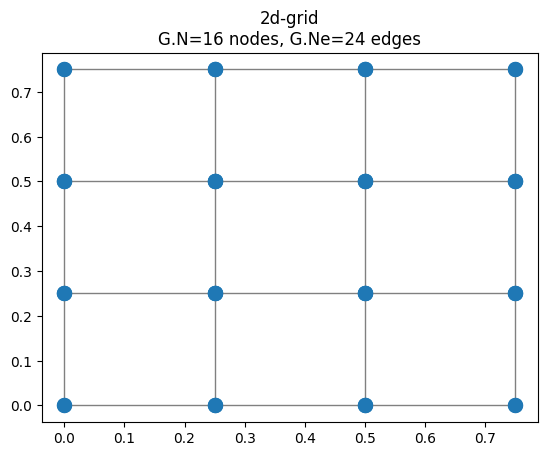

In [5]:
# the grid 2D
Ngridsmall = 4 # to set the number of nodes per row and column
Ggridsmall = graphs.Grid2d(Ngridsmall) # to create the graph
Ggridsmall.plot() # to show the graph

One can display the attributes in the object `Ggridsmall`:

In [6]:
vars(Ggridsmall)

{'logger': <Logger pygsp.graphs.graph (DEBUG)>,
 'N': 16,
 'W': <16x16 sparse matrix of type '<class 'numpy.float64'>'
 	with 48 stored elements in List of Lists format>,
 '_directed': False,
 'Ne': 24,
 'gtype': '2d-grid',
 'lap_type': 'combinatorial',
 'L': <16x16 sparse matrix of type '<class 'numpy.float64'>'
 	with 64 stored elements in Compressed Sparse Column format>,
 'coords': array([[0.  , 0.75],
        [0.25, 0.75],
        [0.5 , 0.75],
        [0.75, 0.75],
        [0.  , 0.5 ],
        [0.25, 0.5 ],
        [0.5 , 0.5 ],
        [0.75, 0.5 ],
        [0.  , 0.25],
        [0.25, 0.25],
        [0.5 , 0.25],
        [0.75, 0.25],
        [0.  , 0.  ],
        [0.25, 0.  ],
        [0.5 , 0.  ],
        [0.75, 0.  ]]),
 'plotting': {'vertex_size': 100,
  'vertex_color': (0.12, 0.47, 0.71, 1),
  'edge_color': (0.5, 0.5, 0.5, 1),
  'edge_width': 1,
  'edge_style': '-',
  'limits': array([-0.25,  1.25,  0.25,  1.25])}}

One can see several important elements composing the graph:
- `N` = number of nodes
- `W` = weighted adjacency matrix
- `Ne` =  number of edges
- `L` = the Laplacian matrix of type `lap_type` (we will see it later)
- `coords` = coordinate of each node. Note that these coordinates are only important for the ploting of the graph. The change of these coordinates would not change the way a signal is processed on this graph (unless the matrix `W` is computed based on these coordinates)

The other variables are options for plotting. 

Let us display the weighted adjacency matrix `W`:

In [7]:
print(Ggridsmall.W)

  (0, 1)	1.0
  (0, 4)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 5)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (2, 6)	1.0
  (3, 2)	1.0
  (3, 7)	1.0
  (4, 0)	1.0
  (4, 5)	1.0
  (4, 8)	1.0
  (5, 1)	1.0
  (5, 4)	1.0
  (5, 6)	1.0
  (5, 9)	1.0
  (6, 2)	1.0
  (6, 5)	1.0
  (6, 7)	1.0
  (6, 10)	1.0
  (7, 3)	1.0
  (7, 6)	1.0
  (7, 11)	1.0
  (8, 4)	1.0
  (8, 9)	1.0
  (8, 12)	1.0
  (9, 5)	1.0
  (9, 8)	1.0
  (9, 10)	1.0
  (9, 13)	1.0
  (10, 6)	1.0
  (10, 9)	1.0
  (10, 11)	1.0
  (10, 14)	1.0
  (11, 7)	1.0
  (11, 10)	1.0
  (11, 15)	1.0
  (12, 8)	1.0
  (12, 13)	1.0
  (13, 9)	1.0
  (13, 12)	1.0
  (13, 14)	1.0
  (14, 10)	1.0
  (14, 13)	1.0
  (14, 15)	1.0
  (15, 11)	1.0
  (15, 14)	1.0


One can see that the adjacency matrix is described in a sparse format, where only the non-zero elements are listed under the format: 

`(index_i,index_j)   w_{i,j}`

If we want to display the matrix in 2D, we have to come back to a regular array description (warning, only for small graphs)

In [8]:
print(Ggridsmall.W.todense())

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]


Another way to vizualize the `W` matrix (when graphs are large)

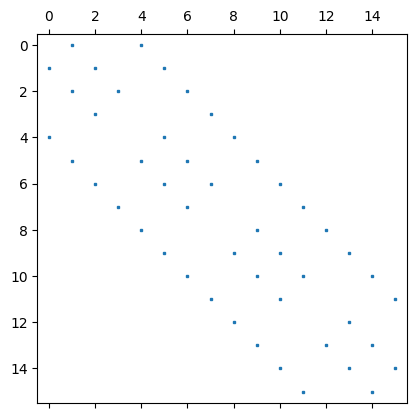

In [9]:
plt.spy(Ggridsmall.W, markersize=2)

We can also look at the Laplacian matrix

In [10]:
print(Ggridsmall.L.todense())

[[ 2. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  3. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  3. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  3. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0. -1.  3.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  3. -1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  4. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  3.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  3. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0. -1.  3. 

One can see the degree $d_i$ of each node on the diagonal and $-w_{i,j}$ on the off diagonal. It well corresponds to the combinatorial Laplacian definition:
$$
\mathbf{L} = \mathbf{D} - \mathbf{W}
$$


> ## Exercice 1.1 - load a graph template
> One of the graph template is called "comet". First create a graph of this type called `Gcomet` and observe its shape. You will see that one node is very specific as it is linked to many other points (and it is the only one in that case). Can you identify the index if this node?

In [11]:
# Your code here ...

> ## Solution 1.1


> Create the graph comet and plot it to vizualize the graph's shape and the peculiar node

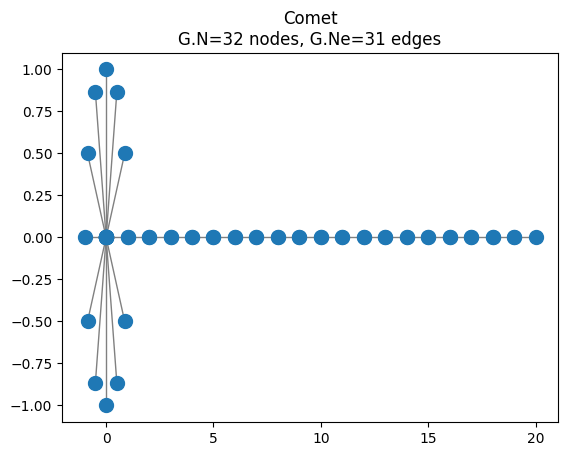

In [12]:
Gcomet = graphs.Comet()
Gcomet.plot()

> Sum the `W` matrix along the colum direction to evaluate the number of connected neighbors (you can also sum along the row direction)

In [13]:
d = np.sum(Gcomet.W.todense(),0)
print(d)

[[12.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.
   2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.]]


> we can see that the node of index 1 has a degree much higher than the otehr ones (12)

## 1.2 - Create a graph from a `W` matrix

Interestingly, the weighted matrix `W`, by itself, describes all pairwise relationship between the nodes, and thus is sufficient to define a graph. We can for example generate a random sparse matrix.

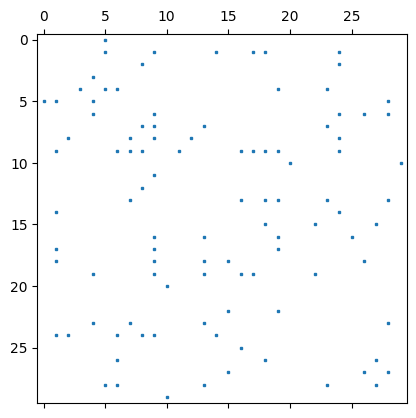

In [14]:
# parameters
Nnodes = 30 # to set the number of nodes
Tsparse = 0.05 # to set the percentage of edges

# W generation
W = np.random.uniform(size=(Nnodes, Nnodes))  # to generate a random matrix (the graph is full)
W[W < 1-Tsparse] = 0  # To sparsify the graph.
W = W + W.T  # To build a undirected graph.
np.fill_diagonal(W, 0)  # to remove self-loops

# graph creation
G = graphs.Graph(W) # to build the graph
plt.spy(G.W, markersize=2) # to visualize the matrix W

If we want to visualize the graph, we need to give a coordinate to each point. One solution is to set it manually, which is long and painful when the number of nodes is high. The other solution is to run the function `set_coordinate()`

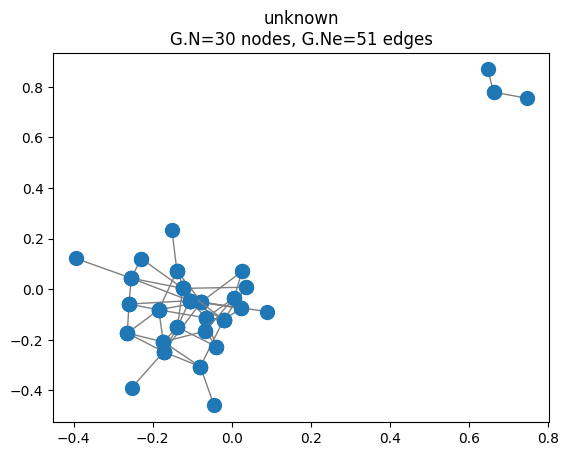

In [15]:
G.set_coordinates()
G.plot()

As said previously, the coordinates does not change the graph itself, but only its vizualisation. 
Therefore, the same graph could be drawn differently, using for example another way of generating the coordinates:

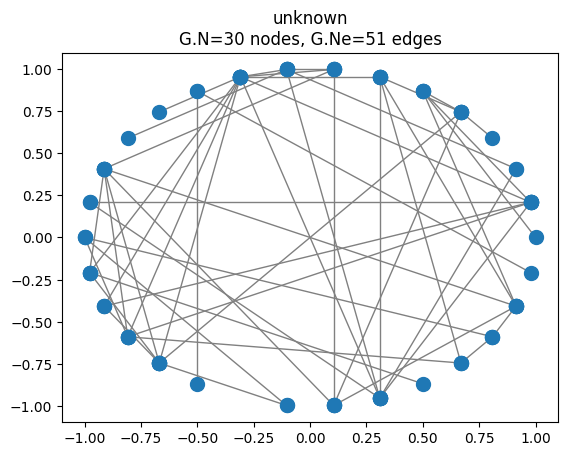

In [16]:
G.set_coordinates(kind='ring2D') # to set the coordinates with the specific ring2D
G.plot()

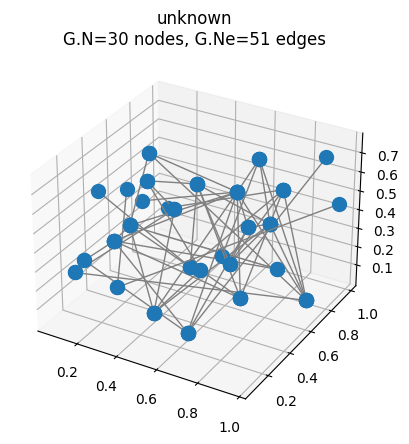

In [17]:
#  other options are: community2D, random2D, random3D, ring2D, line1D
G.set_coordinates(kind='random3D') 
G.plot()

> ## Exercice 1.2 - create a graph
> Create a graph made of two subgraphs

In [ ]:
# your code here

> ## Solution 1.2

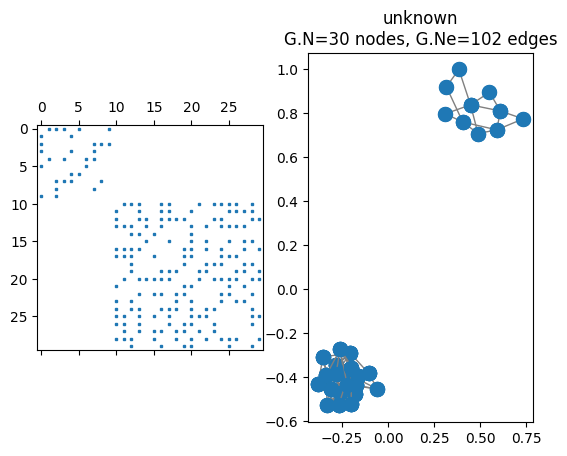

In [18]:
# parameters
Nnodes = 30 # to set the number of nodes
Nnodes_sg1 = 10
Tsparse = 0.30 # to set the percentage of edges

# Wsg generation
Wsg = np.random.uniform(size=(Nnodes, Nnodes))  # to generate a random matrix (the graph is full)
Wsg[Wsg < 1-Tsparse] = 0  # To sparsify the graph.
Wsg = Wsg + Wsg.T  # To build a undirected graph.
np.fill_diagonal(Wsg, 0)  # to remove self-loops

# creation of a block diagonal Wsg matrix
index_sg1 = np.arange(1,Nnodes_sg1)
index_sg2 = np.arange(Nnodes_sg1,Nnodes+1)
Wsg[0:Nnodes_sg1, Nnodes_sg1:Nnodes+1] = 0
Wsg[Nnodes_sg1:Nnodes+1, 0:Nnodes_sg1] = 0


# creation of the graph
Gsg = graphs.Graph(Wsg) # to build the graph

# setting of the coordinates
Gsg.set_coordinates(kind='spring') # "spring" automatically detect subgraphs and will separate them in the space

# another solution is to set it randomly and separate them manually (uncomment the line below if you want to test it)
#Gsg.set_coordinates(kind='random2D')
#Gsg.coords[0:Nnodes_sg1] = Gsg.coords[0:Nnodes_sg1] + [1, 1]

fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(Gsg.W, markersize=2) # to visualize the matrix W
Gsg.plot(show_edges=True, ax=axes[1])

## 1.3 Create a graph from data

In the previous section, the graph was created from a matrix `W` and the 2D coordinates were created afterwards and randomly. This means that the node positions do not correspond to useful information on the correlation between the points. In other words, except from the edges between the nodes, the visual shape of the graph cannot be fully interpreted.

In some applications (and often in graph image processing), the nodes corresponds to sensors that have physical positions (e.g., pixels in an array of pixels, 3D points in a point cloud). In that case, the graph is deduced from the 2D positions. More precisely, the edges are deduced from correlation models that basically say that nodes that are close in space usually have correlated signal values. Let us build such a graph.

Let us first generate the random points

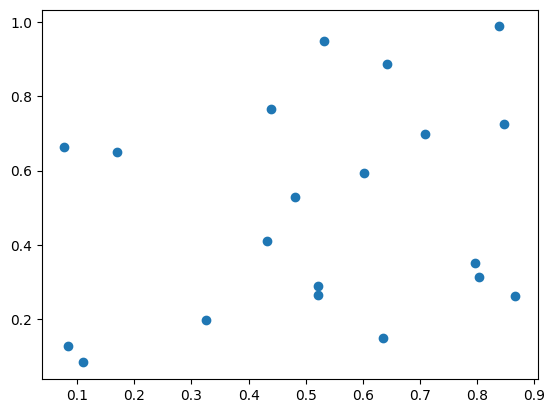

In [19]:
N_nodes = 20
random_points = np.random.uniform(size=(N_nodes, 2)) # for 2D coordinates, the 2 can be any value
plt.scatter(random_points[:, 0], random_points[:, 1]);

Two strategies are now conceivable to connect neighboring points. 

**k-NN**: The first strategy, called k-NN for *k nearest neighbors*, links each points to the `k` closest points in space. For that, a function is already implemented in pygsp. This function also assign a weight $ w_{i,j}$ to these edges with the following value
$$ w_{i,j} = \exp \left(\frac{|| \mathbf{x}_i - \mathbf{x}_j ||_2^2}{\sigma^2}\right) $$
The weight is set to `0` for the non assigned edges.

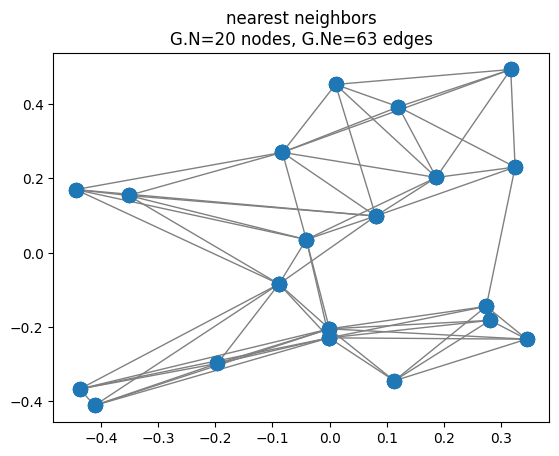

In [20]:
k = 5
sigma = 0.1
Grandom = graphs.NNGraph(random_points, NNtype='knn', k=k, sigma = sigma,  rescale=False, symmetrize_type='maximum')
Grandom.plot()


Connecting points to a fixed number of neighbors as k-NN enables to control the graph connectivity. Indeed the degree of every node is `k`. However, the level of correlation between nodes can be quite heterogeneous.

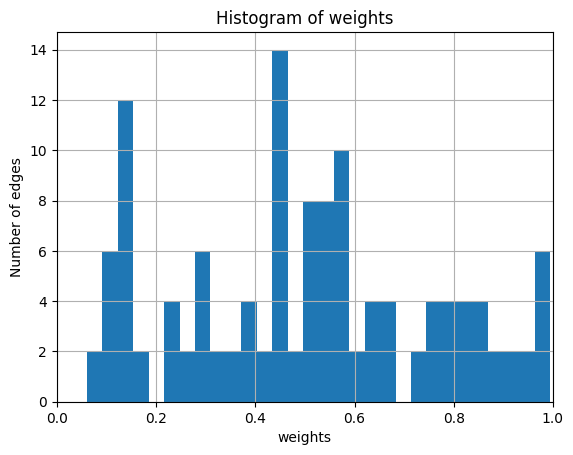

In [21]:
weights_random = Grandom.W.todense().flatten()
weights_random_nz = weights_random[weights_random!=0].transpose()
n, bins, patches  = plt.hist(weights_random_nz,bins=30)
plt.xlabel('weights')
plt.ylabel('Number of edges')
plt.title('Histogram of weights')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

One can observe that very low correlation occurs. Even though it is captured by the weights, setting a minimum correlation could be interesting in some cases. This is done by using the option "radius". 

**radius**: This second way of creating a graph consists in connecting the nodes close than a given radius. Play with the epsilon value to change the connectivity of the graph. (The next cells does not work since an update of scipy)

In [24]:
var_epsilon = 0.2
Grandom2 = graphs.NNGraph(random_points, NNtype='radius', epsilon=var_epsilon, sigma = sigma, rescale=False, symmetrize_type='maximum')
Grandom2.plot()

ValueError: k must be an integer or a sequence of integers

In [23]:
weights_random2 = Grandom2.W.todense().flatten()
weights_random2_nz = weights_random2[weights_random2!=0].transpose()
n, bins, patches  = plt.hist(weights_random2_nz,bins=30)
plt.xlabel('weights')
plt.ylabel('Number of edges')
plt.title('Histogram of weights')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

NameError: name 'Grandom2' is not defined

## 1.4 Graph signal

Once the graph is created, it is possible to define a signal on it. It must have a dimension equal to the number of nodes. Below an example of a random signal.

In [25]:
Nsensor = 100
Gsensor = graphs.Sensor(Nsensor)
signal = np.random.normal(size=Gsensor.N)

It is possible to display the signal by using the code below

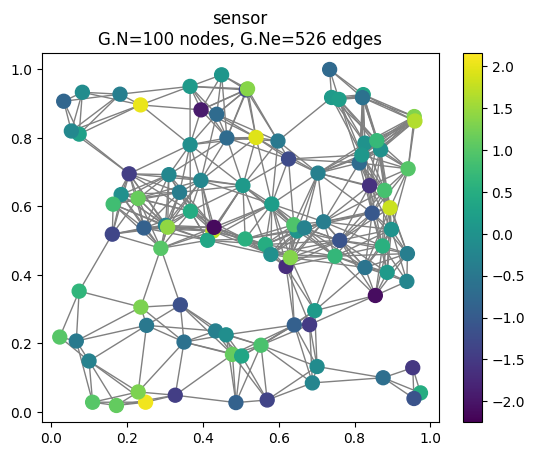

In [26]:
Gsensor.plot_signal(signal)

> ## Exercice 1.4 - create a signal
> On the 2D grid graph, create two signals: one random, and one that is -1 on the left column and slowly increases to 1 when moving to the right. You can reuse the graph `Ggrid`.

In [ ]:
# your code here

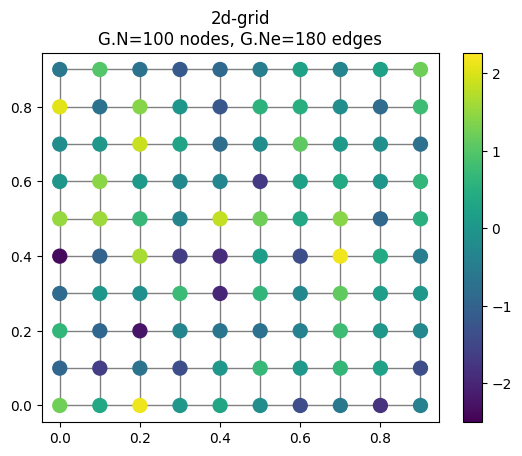

In [27]:
signal_grid_random = np.random.normal(size=Ggrid.N)
Ggrid.plot_signal(signal_grid_random)

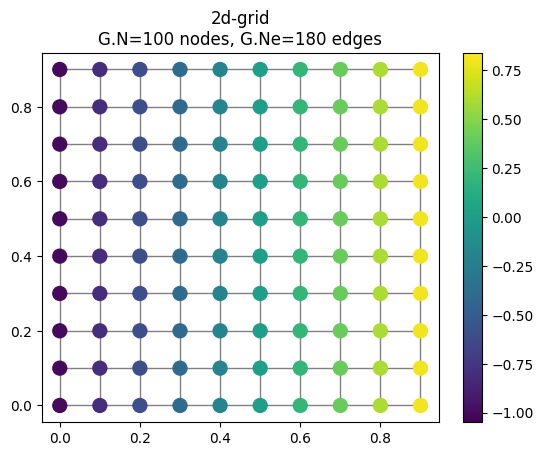

In [28]:
# initialize
signal_grid_increase = np.random.normal(size=Ggrid.N)
for i in range(0,Ggrid.N):
    signal_grid_increase[i] = (Ggrid.coords[i][0]-0.5)*2
Ggrid.plot_signal(signal_grid_increase)

<a id='2-graph-var-operators'></a> 
# 2 - Graph variational operators

Graph variational operators are used to evaluate the variation of a signal on a given graph. Let us take two random signals with two different variance.

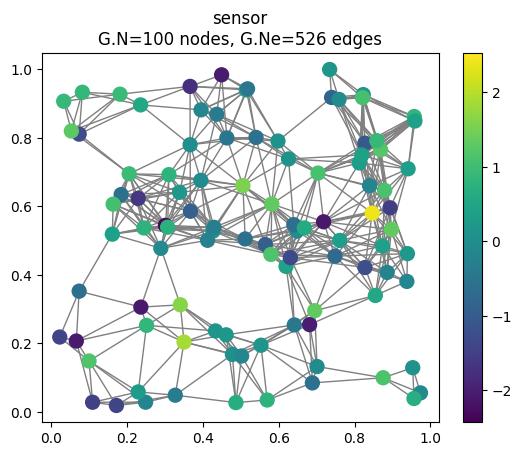

In [29]:
scale_low = 1
signal_low_variance = np.random.normal(size=Gsensor.N,scale=scale_low)
Gsensor.plot_signal(signal_low_variance)

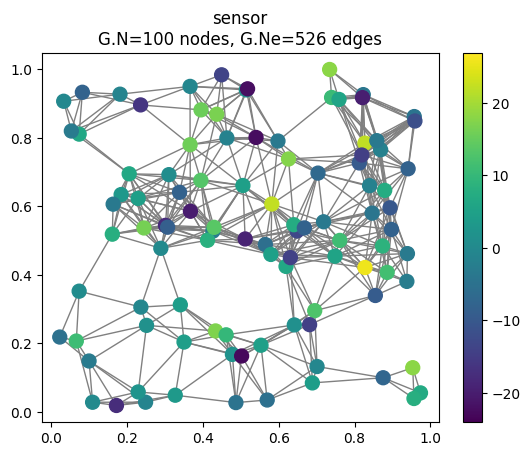

In [30]:
scale_high = 10
signal_high_variance = np.random.normal(size=Gsensor.N,scale=scale_high)
Gsensor.plot_signal(signal_high_variance)

We can compute the total variation as the product $\mathbf{f}^\top \mathbf{L} \mathbf{f}$

In [31]:
signal_low_variance.T @ Gsensor.L @ signal_low_variance

776.4050249448286

In [32]:
signal_high_variance.T @ Gsensor.L @ signal_high_variance

104544.66943936732

## Exercice 2 - compare signal variations
Compare the variation of the two signals created in Exercice 1.4

In [ ]:
# your code here

In [33]:
#first normalize the signals
signal_grid_random_n = signal_grid_random/np.linalg.norm(signal_grid_random)
signal_grid_random_n.T @ Ggrid.L @ signal_grid_random_n

3.314948488479288

In [34]:
signal_grid_increase_n = signal_grid_increase/np.linalg.norm(signal_grid_increase)
signal_grid_increase_n.T @ Ggrid.L @ signal_grid_increase_n

0.10588235294117657

<a id='3-graph-transform'></a> 

# 3 - Graph Transform

## 3.1 Graph Fourier basis

Here is how the graph fourier basis can be computed for a graph, and how we can display them. We do it for the two toy example graph, but you can do it for all the graphs seen before.

Let us start for the `Ggrid`, for which, we display the eigenvector of index `0`, `4` and `99`

In [ ]:
i_eigenvector = 0
Ggrid.compute_fourier_basis()
Ggrid.plot_signal(Ggrid.U[:, i_eigenvector])

In [ ]:
i_eigenvector = 4
Ggrid.compute_fourier_basis()
Ggrid.plot_signal(Ggrid.U[:, i_eigenvector])

In [ ]:
i_eigenvector = 99
Ggrid.compute_fourier_basis()
Ggrid.plot_signal(Ggrid.U[:, i_eigenvector])

Let us now compute for `Gtorus`

In [ ]:
i_eigenvector = 2
Gtorus.compute_fourier_basis()
Gtorus.plot_signal(Gtorus.U[:, i_eigenvector])

In [ ]:
i_eigenvector = 30
Gtorus.compute_fourier_basis()
Gtorus.plot_signal(Gtorus.U[:, i_eigenvector])

In [ ]:
i_eigenvector = 399
Gtorus.compute_fourier_basis()
Gtorus.plot_signal(Gtorus.U[:, i_eigenvector])

## 3.2 Graph Fourier Transform

Let us take the signal `signal_grid_random` defined on the graph `Ggrid` and compute its Graph Fourier Transform (GFT). We display the absolute value of the GFT.

In [ ]:
signal_grid_random_t = np.abs(Ggrid.gft(signal_grid_random))
plt.plot(signal_grid_random_t)
plt.xlabel('i')
plt.ylabel('$\hat{f}[i]$')

## Exercice 3.2
Compute and display the graph transform of the two signals created in Exercice 1.4


In [ ]:
signal_grid_random_n_t = np.abs(Ggrid.gft(signal_grid_random_n))
plt.plot(signal_grid_random_n_t)

In [ ]:
signal_grid_increase_n_t = np.abs(Ggrid.gft(signal_grid_increase_n))
plt.plot(signal_grid_increase_n_t)

In [ ]:
# your code here